# Logistic regression

## Steps

### 1) Import the required library

### 2) Import data

### 3) Data cleaning
        1) Check missing values 
        2) Check Duplicate
        3) Check out layers by using 'IQR' method
        4) Check structure or unstructured data
        5) Check data type in a correct format
        
### 4) EDA (Exploratory Data Analysis)
        1) Plot the data and check the linear decision boundary
   
### 5) Encode the data (Convert categorical data to numerical data) (if it necessary we use else skip it)
        1) Label encoding
            It is used for binary categorical data or binary ordered categorical data
        2) One hot encoding
            It is used to Multiclass categorical data for nominal data or unordered data
            
### 6) Split the data      
         Futures (X - axis) (2D Matrix)
         Targe (Y - axis) (1D Array)
         Train, Test, Split, Random state

### 7) Scaling the data (Scaling only for multi-column with different range data) (note: - Scale only future)
           1) Import model
           2) Initialize
           3) Fit (Learning process)
           4) Transform
          
### 8) Apply Machine learning algorithm
           1) Import model
           2) Initialize
           3) Fit (Learning process)
           4) Predict

### 9) Evaluation matric (Check whether the model is correct or not)
           1) Accuracy score
               The ratio of correct predictions to the total number of predictions made. Higher accuracy is a better model
               
               Formula: Accuracy score = (number of correct predictions) / (total number of predictions)

           2) F1 score
               The F1 score is closely related to the confusion matrix. 
               The confusion matrix is a table that summarizes the performance of a classification model by presenting the 
               counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.
               
                                   Actual Positive   Actual Negative
               Predicted Positive       TP               FP
               Predicted Negative       FN               TN
               
               In the context of the confusion matrix, the F1 score can be derived from the counts of TP, FP, and FN. 
               As mentioned, the F1 score is the harmonic mean of precision and recall. 
               Precision (P) and recall (R) can be calculated using the following formulas:
               
               Precision (P) = TP / (TP + FP)
               Recall (R) = TP / (TP + FN)
                          
               The F1 score is a harmonic mean of precision and recall. It provides a balance between precision and recall, 
               making it useful in cases where both false positives and false negatives are critical.
               
               Formula: F1 score = 2 * (precision * recall) / (precision + recall)
               
               (or)
               
               Formula: F1 score = TP/TP+1/2(FP+FN)
               
               F1 score between 0 (low) to 1 (high) Higher F1 score better the model


## Logistic regression working principle (Sigmoid Function)

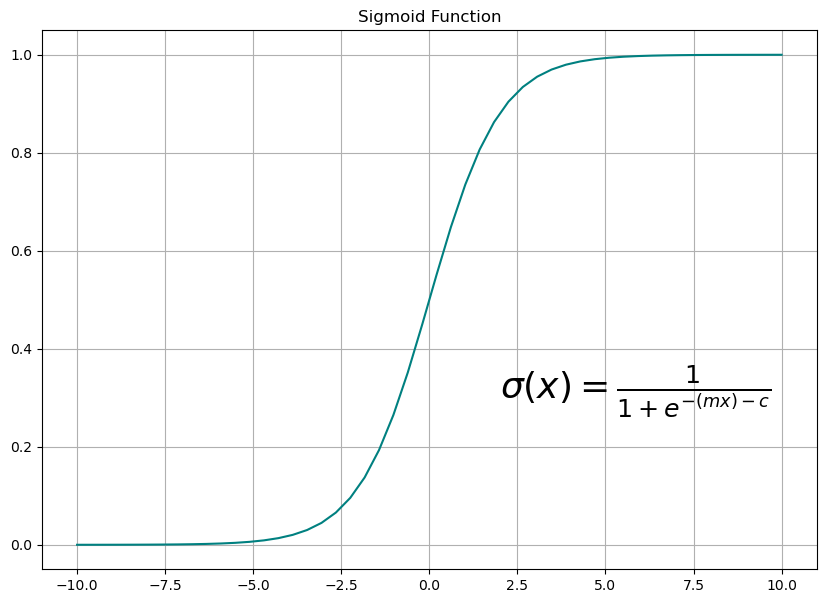

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return(1/(1 + np.exp(-x)))

x_values_for_sigmoid = np.linspace(-10, 10)
plt.figure(figsize=(10, 7))
plt.plot(x_values_for_sigmoid, sigmoid(x_values_for_sigmoid), c='teal')
plt.title('Sigmoid Function')
plt.grid(True)
plt.text(2, 0.3, r'$\sigma(x)=\frac{1}{1+e^{-(mx)-c}}$', fontsize=26)
plt.show()

## Steps

In [2]:
# 1) Import the required library

# File read and handling
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Data spliting
from sklearn.model_selection import train_test_split

# Apply Machine learning algorithm


# Evaluation matric
from sklearn import metrics

In [3]:
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

data = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])

print(data.shape)
data.head()

(40, 4)


,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [4]:
# 3) Data cleaning
    # 1) Check missing values
data.isnull().sum()

gmat               0
gpa                0
work_experience    0
admitted           0
dtype: int64

In [5]:
# 3) Data cleaning
    # 2) Check Duplicate
data.duplicated().sum()

2

In [6]:
data.drop_duplicates(inplace=True)
data.shape

(38, 4)

In [7]:
# 3) Data cleaning
    # 3) Check out layers by using 'IQR' method
data.describe()

,gmat,gpa,work_experience,admitted
count,38.000000,38.000000,38.000000,38.000000
mean,653.157895,3.063158,3.315789,0.447368
std,62.778257,0.631780,1.710149,0.503897
min,540.000000,1.700000,1.000000,0.000000
25%,602.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,3.500000,0.000000
75%,690.000000,3.600000,4.750000,1.000000
max,780.000000,4.000000,6.000000,1.000000


In [8]:
# 'gmat' Columns
IQR = data['gmat'].quantile(0.75) - data['gmat'].quantile(0.25)
upper_threshold = data['gmat'].quantile(0.75) + (1.5*IQR)  # > q3 + 1.5iqr
lower_threshold = data['gmat'].quantile(0.25) - (1.5*IQR)  # < q1 - 1.5iqr

data['gmat'] = data['gmat'].clip(upper_threshold, lower_threshold) # eliminate out layers

upper_threshold, lower_threshold
# No out layers

(821.25, 471.25)

In [9]:
# 'gpa' Columns
IQR = data['gpa'].quantile(0.75) - data['gpa'].quantile(0.25)
upper_threshold = data['gpa'].quantile(0.75) + (1.5*IQR)  # > q3 + 1.5iqr
lower_threshold = data['gpa'].quantile(0.25) - (1.5*IQR)  # < q1 - 1.5iqr

data['gpa'] = data['gpa'].clip(upper_threshold, lower_threshold) # eliminate out layers

upper_threshold, lower_threshold
# No out layers

(4.95, 1.3500000000000003)

In [10]:
# 'work_experience	' Columns
IQR = data['work_experience'].quantile(0.75) - data['work_experience'].quantile(0.25)
upper_threshold = data['work_experience'].quantile(0.75) + (1.5*IQR)  # > q3 + 1.5iqr
lower_threshold = data['work_experience'].quantile(0.25) - (1.5*IQR)  # < q1 - 1.5iqr

data['work_experience'] = data['work_experience'].clip(upper_threshold, lower_threshold) # eliminate out layers

upper_threshold, lower_threshold
# No out layers

(8.875, -2.125)

In [11]:
# 3) Data cleaning
    # 4) Check structure or unstructure data
data.shape

(38, 4)

In [12]:
# 3) Data cleaning
    # 5) Check data type in a correct format
data.dtypes

gmat                 int64
gpa                float64
work_experience      int64
admitted             int64
dtype: object

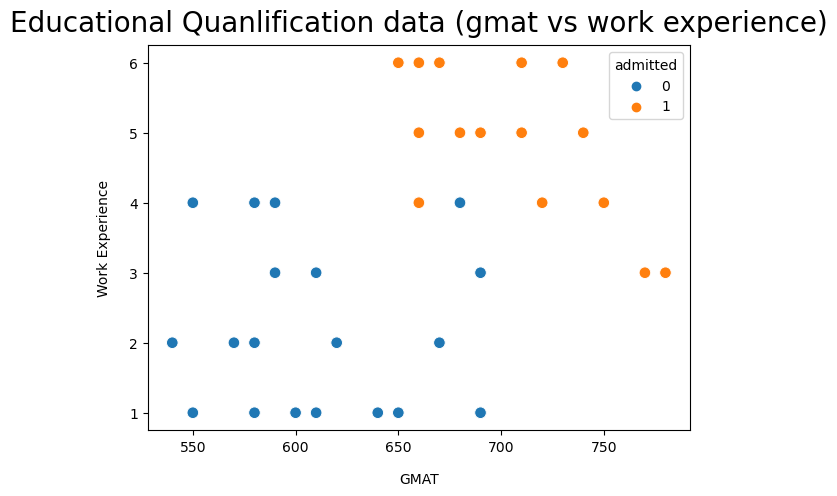

In [13]:
# 4) EDA (Exploratory Data Analysis)
    # 1) Plot the data and check the relations
    
    # a) gmat vs work experience
plt.figure(figsize=(7, 5))
sns.scatterplot(x='gmat', y='work_experience', hue='admitted', data=data, s=70)
plt.title("Educational Quanlification data (gmat vs work experience)", y=1.015, fontsize=20)
plt.xlabel("GMAT", labelpad=13)
plt.ylabel("Work Experience", labelpad=13)
ax = plt.gca()

# Data have  lienar decision boundary

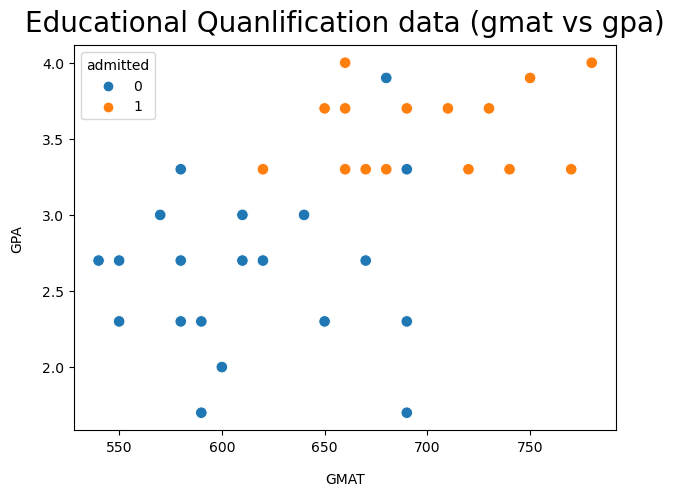

In [14]:
    # b) gmat vs gpa
plt.figure(figsize=(7, 5))
sns.scatterplot(x='gmat', y='gpa', hue='admitted', data=data, s=70)
plt.title("Educational Quanlification data (gmat vs gpa)", y=1.015, fontsize=20)
plt.xlabel("GMAT", labelpad=13)
plt.ylabel("GPA", labelpad=13)
ax = plt.gca()

# Data have  lienar decision boundary

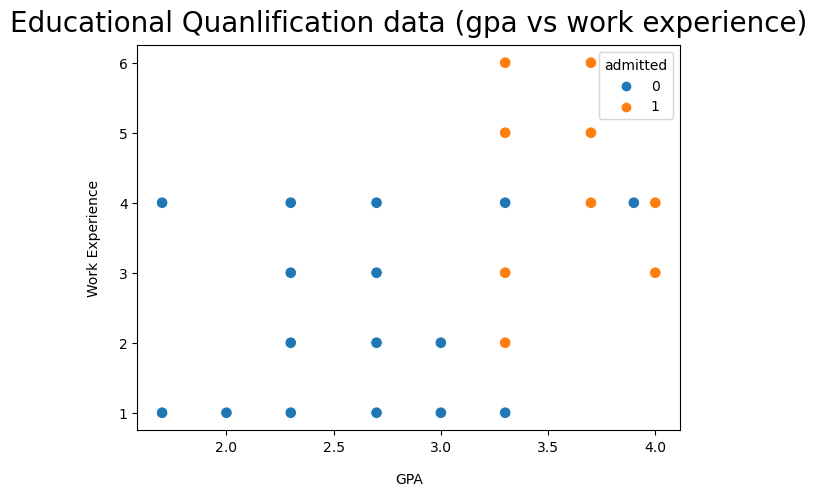

In [15]:
    # c) gpa vs work experience
plt.figure(figsize=(7, 5))
sns.scatterplot(x='gpa', y='work_experience', hue='admitted', data=data, s=70)
plt.title("Educational Quanlification data (gpa vs work experience)", y=1.015, fontsize=20)
plt.xlabel("GPA", labelpad=13)
plt.ylabel("Work Experience", labelpad=13)
ax = plt.gca()

# Data have  lienar decision boundary

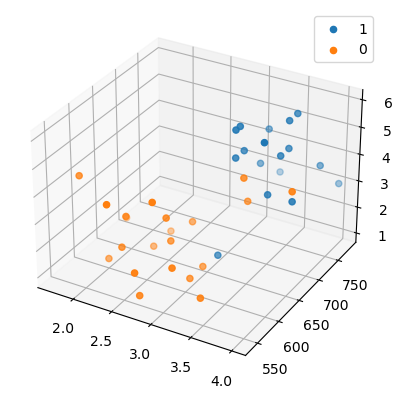

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in data.admitted.unique():
    ax.scatter(data.gpa[data.admitted==s],data.gmat[data.admitted==s],data['work_experience'][data.admitted==s],label=s)
    
ax.legend()

# Data have clear linear decision boundary

In [17]:
# 5) Encode the data(Convert categorical data to numerical data) 
# It doesn't have categorical data so it is not necessary and skip the step

In [18]:
# Data Pre processing
# 6) Split the data
x = data[['gmat', 'gpa','work_experience']] # Futures (X - axis)(2D Matrix)
y = data['admitted'] # Targe  (Y - axis)(1D Array)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) # train- test split
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28, 3), (10, 3), (28,), (10,))

In [19]:
# Data Pre processing
# 7) Scaling the data (Scaling only for multi-column with different range data so skip the step)

In [20]:
# 8) Apply Machine learning algorithm
    # 1) Import model
from sklearn.linear_model import LogisticRegression
    
    # 2) Initialize
logistic_regression = LogisticRegression()  # Sigmoid Function y = (1/(1 + exp(-(mx)-c))) for single future
                                       # Sigmoid Function y = (1/(1 + exp(-(m1x1+m2x2+m3x3)-c))) for multi future 
    # 3) Fit (learning process)
logistic_regression.fit(x_train,y_train)

    # 4) Predict
a = int(input('Gmat Score: '))
b = float(input('Gpa: '))
c = int(input('Work experience(Years): '))
logistic_regression.predict([[a,b,c]]) # Insert Futures ('x-value')

Gmat Score: 750
Gpa: 5
Work experience(Years): 2


C:\Users\AVA Computers\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [21]:
# Predict probability to Admitted
logistic_regression.predict_proba([[a,b,c]])

C:\Users\AVA Computers\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.22396594, 0.77603406]])

In [22]:
logistic_regression.coef_  # m - slope

array([[0.04034957, 0.28659868, 1.27890116]])

In [23]:
logistic_regression.intercept_ # c - intercept

array([-33.0102682])

In [24]:
# Check the formula
from math import exp

y = (1 / (1 + exp(-(0.04034957 * a + 0.28659868 * b + 1.27890116 * c) - (-33.0102682))))

y

0.7760345111544694

In [25]:
# 9)Evaluation matric (Check whether the model is correct or not)
        # 1) Accuracy score
        # 2) F1 score
        
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

y_predict = logistic_regression.predict(x_test)

df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_predict})

df

,Actual value,Predicted value
22,0,0
30,0,0
16,0,0
15,0,0
11,1,1
20,1,0
26,1,0
10,0,0
25,1,1
2,0,0


In [26]:
        # 1) Accuracy score
logistic_regression.score(x_test,y_test) # Accuracy score
# accuracy_score(y_test,y_predict) #Accuracy score (Another method)

# Higher accuracy is a better model (The value should near to 1)

0.8

In [27]:
        # 2) F1 score
f1_score(y_test,y_predict) # F1 score

# F1 score between 0 (low) to 1 (high) 
# Higher F1 score better the model 

0.6666666666666666

In [28]:
confusion_matrix(y_test,y_predict)

array([[6, 0],
       [2, 2]], dtype=int64)